In [14]:
import os
import numpy as np
import matplotlib.pyplot as plt
import librosa

from IPython.display import Audio

from neurovoc import bruce, reconstruct, specres

data_path = "../data"
sound_name_MP = os.path.join(data_path, 'masker_90dB_probe_84dB.wav')
sound_name_M = os.path.join(data_path, 'masker_90.wav')

In [15]:
original_MP, fs = librosa.load(sound_name_MP, sr=44100)
original_M, fs = librosa.load(sound_name_M, sr=44100)

y = original_MP + np.random.normal(scale=1e-12)

bruce_ng = bruce(y, audio_fs=fs, window_size=15) 

Audio(data=y, rate=fs)

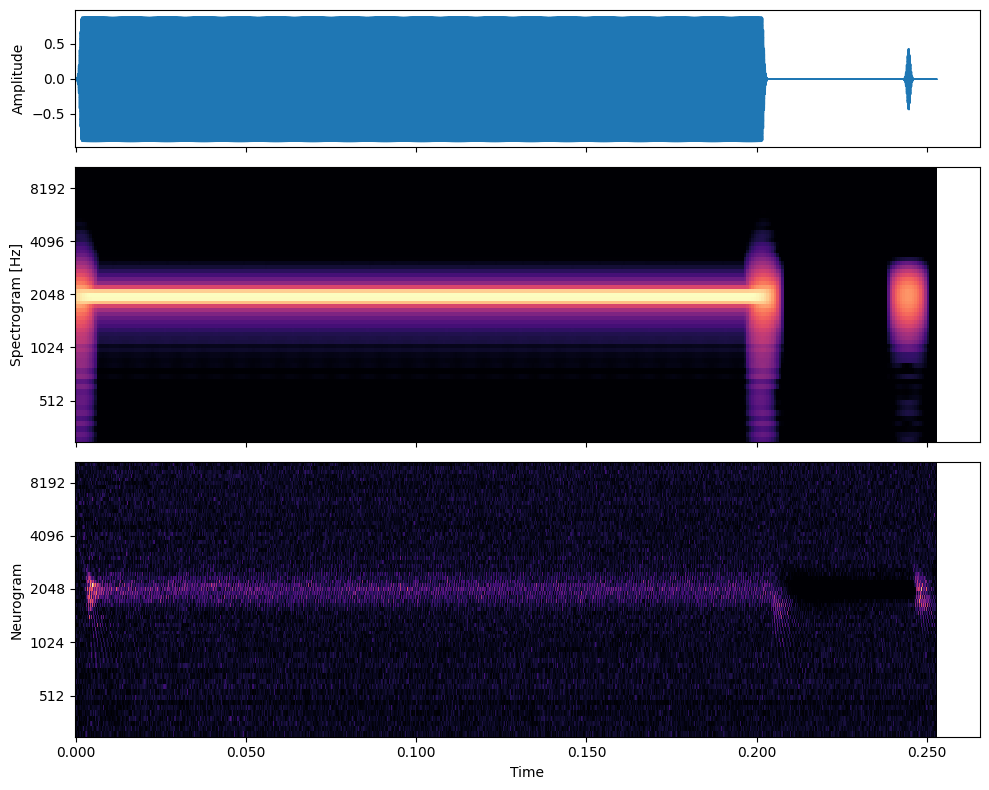

In [16]:
def get_spectrogram(y, sr, n_fft, hops):
    S = librosa.feature.melspectrogram(
        y=y, 
        sr=sr, 
        n_mels=64, 
        fmin=150, 
        fmax=10_500,
        n_fft=n_fft, 
        hop_length=hops
    )

    S_dB = librosa.power_to_db(S, ref=np.max)
    return S_dB


n_fft = 512
hops = 32
S_db = get_spectrogram(y, fs, n_fft, hops)

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, height_ratios=[1, 2, 2], sharex=True, figsize=(10, 8))
librosa.display.waveshow(y, sr=fs, ax=ax1)
img = librosa.display.specshow(
    S_db, 
    x_axis='time',
    y_axis='mel', sr=fs,
    fmin=150, fmax=10_500, 
    n_fft=n_fft, hop_length=hops, ax=ax2
)

librosa.display.specshow(
    bruce_ng.data, 
    x_axis='time',
    y_axis='mel', 
    x_coords=np.arange(bruce_ng.shape[1]) * bruce_ng.dt,
    y_coords=bruce_ng.frequencies,
    ax=ax3
)
ax1.set_xlabel("")
ax2.set_xlabel("")
ax1.set_ylabel("Amplitude")
ax2.set_ylabel("Spectrogram [Hz]")
ax3.set_ylabel("Neurogram")

plt.tight_layout()

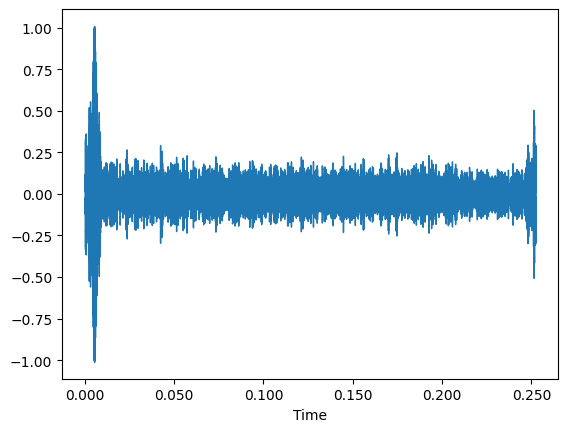

In [17]:
y_recon = reconstruct(bruce_ng, target_sr=fs)
librosa.display.waveshow(y_recon, sr=fs)
Audio(data=y_recon, rate=fs)